In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
spark = SparkSession.builder.appName("walmart_stock").getOrCreate()

#can't inferSchema with json
df = spark.read.csv('walmart_stock.csv', header=True, inferSchema=True)
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [7]:
df.head

<bound method DataFrame.head of DataFrame[Date: string, Open: double, High: double, Low: double, Close: double, Volume: int, Adj Close: double]>

In [8]:
df["Date"]

Column<b'Date'>

In [9]:
#dataframe type
type(df.select("Date"))

pyspark.sql.dataframe.DataFrame

In [10]:
type(df.head(2))
df.head()

Row(Date='2012-01-03', Open=59.970001, High=61.060001, Low=59.869999, Close=60.330002, Volume=12668800, Adj Close=52.619234999999996)

In [11]:
df.select(['date', 'Volume'])

DataFrame[date: string, Volume: int]

In [12]:
df.withColumn('Avg',(df['High']+df['Low'])/2.0).show(1)

+----------+---------+---------+---------+---------+--------+------------------+------+
|      Date|     Open|     High|      Low|    Close|  Volume|         Adj Close|   Avg|
+----------+---------+---------+---------+---------+--------+------------------+------+
|2012-01-03|59.970001|61.060001|59.869999|60.330002|12668800|52.619234999999996|60.465|
+----------+---------+---------+---------+---------+--------+------------------+------+
only showing top 1 row



In [13]:
df.withColumnRenamed('Volume','Vol')

DataFrame[Date: string, Open: double, High: double, Low: double, Close: double, Vol: int, Adj Close: double]

In [14]:
# double quotes: direct sql syntax
df.filter("Close < 500").select('Open').show(1)

+---------+
|     Open|
+---------+
|59.970001|
+---------+
only showing top 1 row



In [15]:
df.filter(df['Close']<500).show(1)

+----------+---------+---------+---------+---------+--------+------------------+
|      Date|     Open|     High|      Low|    Close|  Volume|         Adj Close|
+----------+---------+---------+---------+---------+--------+------------------+
|2012-01-03|59.970001|61.060001|59.869999|60.330002|12668800|52.619234999999996|
+----------+---------+---------+---------+---------+--------+------------------+
only showing top 1 row



In [16]:
result = df.filter(df['Date']== '2012-01-03').collect()
result

[Row(Date='2012-01-03', Open=59.970001, High=61.060001, Low=59.869999, Close=60.330002, Volume=12668800, Adj Close=52.619234999999996)]

In [17]:
row = result[0]
row.asDict()

{'Date': '2012-01-03',
 'Open': 59.970001,
 'High': 61.060001,
 'Low': 59.869999,
 'Close': 60.330002,
 'Volume': 12668800,
 'Adj Close': 52.619234999999996}

In [18]:
row.asDict()['Volume']

12668800

In [19]:
df.groupBy('Date').mean().show(5)

+----------+---------+---------+-----------------+----------+-----------+--------------+
|      Date|avg(Open)|avg(High)|         avg(Low)|avg(Close)|avg(Volume)|avg(Adj Close)|
+----------+---------+---------+-----------------+----------+-----------+--------------+
|2013-03-14|73.870003|     74.0|        73.129997| 73.220001|  6353200.0|     65.858804|
|2014-05-27|75.709999|75.809998|        75.290001| 75.589996|  5370800.0|     70.092074|
|2015-05-01|78.199997|78.760002|78.16999799999999| 78.599998|  4999700.0|     74.216263|
|2016-08-17|71.989998|72.949997|        71.989998|     72.93|  1.43433E7|     71.883186|
|2014-07-14|77.129997|    77.25|        76.480003| 76.550003|  4822900.0|     70.982256|
+----------+---------+---------+-----------------+----------+-----------+--------------+
only showing top 5 rows



In [20]:
df.createOrReplaceTempView('stonks')

In [21]:
sql = spark.sql("select * from stonks")

# month, hour, dayofmonth, dayofyear, weekofyear, format_number, date_format

In [22]:
df.select(month(df['Date'])).show(1)

+-----------+
|month(Date)|
+-----------+
|          1|
+-----------+
only showing top 1 row



In [23]:
df.groupBy(year(df['Date'])).count().show()

+----------+-----+
|year(Date)|count|
+----------+-----+
|      2015|  252|
|      2013|  252|
|      2014|  252|
|      2012|  250|
|      2016|  252|
+----------+-----+



In [33]:
#avg closing price per month
month_df = df.withColumn('Month', month(df['Date']))


In [34]:
month_df

DataFrame[Date: string, Open: double, High: double, Low: double, Close: double, Volume: int, Adj Close: double, Month: int]

In [40]:
'''
people.filter(people.age > 30)
      .join(department, people.deptId == department.id)
      .groupBy(department.name, "gender")
          .agg({"salary": "avg", "age": "max"})
'''


month_df.groupBy().mean().select(["Month", "avg(Close)"])

AnalysisException: cannot resolve '`Month`' given input columns: [avg(Adj Close), avg(Close), avg(High), avg(Low), avg(Month), avg(Open), avg(Volume)];;
'Project ['Month, avg(Close)#653]
+- Aggregate [avg(Open#17) AS avg(Open)#650, avg(High#18) AS avg(High)#651, avg(Low#19) AS avg(Low)#652, avg(Close#20) AS avg(Close)#653, avg(cast(Volume#21 as bigint)) AS avg(Volume)#654, avg(Adj Close#22) AS avg(Adj Close)#655, avg(cast(Month#417 as bigint)) AS avg(Month)#656]
   +- Project [Date#16, Open#17, High#18, Low#19, Close#20, Volume#21, Adj Close#22, month(cast(Date#16 as date)) AS Month#417]
      +- Relation[Date#16,Open#17,High#18,Low#19,Close#20,Volume#21,Adj Close#22] csv


In [31]:
resuot = month_df.


ModuleNotFoundError: No module named 'databircks'

AttributeError: 'NoneType' object has no attribute 'select'

In [14]:
df.describe().show()

+-------+----------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|      Date|              Open|             High|              Low|            Close|           Volume|        Adj Close|
+-------+----------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|      1258|              1258|             1258|             1258|             1258|             1258|             1258|
|   mean|      null| 72.35785375357709|72.83938807631165| 71.9186009594594|72.38844998012726|8222093.481717011|67.23883848728146|
| stddev|      null|  6.76809024470826|6.768186808159218|6.744075756255496|6.756859163732991|  4519780.8431556|6.722609449996857|
|    min|2012-01-03|56.389998999999996|        57.060001|        56.299999|        56.419998|          2094900|        50.363689|
|    max|2016-12-30|         90.800003|        90.970001|            89.25|        90.4700

In [16]:
result = df.describe()
result.select(result['summary'],
              format_number(result['Open'].cast('float'),2).alias('Open'),
              format_number(result['High'].cast('float'),2).alias('High'),
              format_number(result['Low'].cast('float'),2).alias('Low'),
              format_number(result['Close'].cast('float'),2).alias('Close'),
              result['Volume'].cast('int').alias('Volume')
             ).show()

+-------+--------+--------+--------+--------+--------+
|summary|    Open|    High|     Low|   Close|  Volume|
+-------+--------+--------+--------+--------+--------+
|  count|1,258.00|1,258.00|1,258.00|1,258.00|    1258|
|   mean|   72.36|   72.84|   71.92|   72.39| 8222093|
| stddev|    6.77|    6.77|    6.74|    6.76| 4519780|
|    min|   56.39|   57.06|   56.30|   56.42| 2094900|
|    max|   90.80|   90.97|   89.25|   90.47|80898100|
+-------+--------+--------+--------+--------+--------+



In [17]:
df2 = df.withColumn("HV Ratio",df["High"]/df["Volume"])#.show()
# df2.show()
df2.select('HV Ratio').show()

+--------------------+
|            HV Ratio|
+--------------------+
|4.819714653321546E-6|
|6.290848613094555E-6|
|4.669412994783916E-6|
|7.367338463826307E-6|
|8.915604778943901E-6|
|8.644477436914568E-6|
|9.351828421515645E-6|
| 8.29141562102703E-6|
|7.712212102001476E-6|
|7.071764823529412E-6|
|1.015495466386981E-5|
|6.576354146362592...|
| 5.90145296180676E-6|
|8.547679455011844E-6|
|8.420709512685392E-6|
|1.041448341728929...|
|8.316075414862431E-6|
|9.721183814992126E-6|
|8.029436027707578E-6|
|6.307432259386365E-6|
+--------------------+
only showing top 20 rows



In [18]:
df.orderBy(df["High"].desc()).head(1)[0][0]

'2015-01-13'

In [19]:
df.select(mean("Close")).show()

+-----------------+
|       avg(Close)|
+-----------------+
|72.38844998012726|
+-----------------+



In [20]:
df.select(max("Volume"),min("Volume")).show()

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|   80898100|    2094900|
+-----------+-----------+



array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Adj Close'}>]], dtype=object)

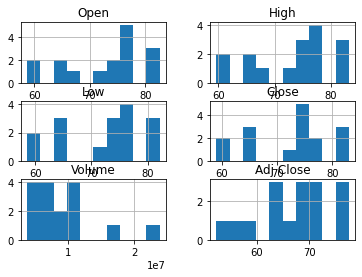

In [29]:
df.sample(False, .01).toPandas().hist()